## Topic Model Diary Chunk Prep for Authorless LDA

## Resources

In [1]:
# Packages
import pandas as pd
import gensim
#from gensim.utils import simple_preprocess
import pickle
from collections import Counter
from matplotlib import pyplot as plt

In [2]:
# Function for conversion of texts into list of lowercase tokens

def text_to_words(texts):
    for text in texts:
        yield(gensim.utils.simple_preprocess(str(text), 
                                             deacc=True, # removes accents
                                             min_len=3))   # removes tokens shorter than three characters

In [5]:
# Get pre-downsampling set back
with open("20240916_PhD_DiaChkNV_Authorless.txt", "rb") as fp:   # Unpickling
    tokensPre = pickle.load(fp)

print(tokensPre[0])
len(tokensPre)

['day', 'talk', 'night', 'feel', 'today', 'leave', 'breakfast', 'hiern', 'station', 'back', 'talk', 'go', 'tank', 'mile', 'make', 'get', 'water', 'darn', 'sock', 'stocking', 'have', 'cut', 'clothe', 'charra', 'wind', 'thing', 'morning', 'thunder', 'drop', 'rain', 'get', 'hand', 'sewing', 'throat', 'keep', 'cold', 'leave', 'worrier', 'boy', 'have', 'thunder', 'lightning', 'rain', 'day', 'sew', 'day', 'keep', 'talk', 'go', 'bed', 'hour', 'night', 'get', 'morning', 'have', 'head', 'ache', 'day', 'want', 'rest', 'sit', 'tonight', 'road', 'mercaney', 'sheep', 'torment', 'child', 'rub', 'grease', 'plate', 'smoke', 'candle', 'mark', 'boy', 'face', 'drink', 'tea', 'kill', 'leave', 'have', 'rain', 'thunder']


1023

In [6]:
# Get downsampled set
df = pd.read_csv("20240916_PhD_DiaryCorpus_Downsampled.tsv", sep='\t', header=None) 
df = df.rename(columns={0:'docID-AT', 1: 'docauthorid', 2: 'tokens'}) # Change column name to "docID-AT"

# Add texts to lemmenized 
#df['tokensPre'] = tokensPre

# Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   docID-AT     1023 non-null   int64 
 1   docauthorid  1023 non-null   object
 2   tokens       1023 non-null   object
dtypes: int64(1), object(2)
memory usage: 24.1+ KB


In [7]:
# Convert tokens column of strings to lists of tokens

tokensPost = df.tokens.values.tolist()
tokensPost = list(text_to_words(tokensPost))
len(tokensPost)
print(tokensPost[0])

['talk', 'today', 'breakfast', 'station', 'back', 'talk', 'tank', 'mile', 'water', 'darn', 'sock', 'stocking', 'cut', 'clothe', 'charra', 'wind', 'thing', 'thunder', 'drop', 'rain', 'hand', 'sewing', 'throat', 'keep', 'cold', 'worrier', 'boy', 'thunder', 'lightning', 'rain', 'sew', 'keep', 'talk', 'hour', 'head', 'ache', 'want', 'rest', 'sit', 'tonight', 'road', 'sheep', 'torment', 'child', 'rub', 'grease', 'plate', 'smoke', 'mark', 'boy', 'face', 'drink', 'kill', 'rain', 'thunder']


In [8]:
countsPre = Counter(x for sublist in tokensPre for x in sublist)
len(Counter(countsPre))

7065

In [9]:
# how may words in dictionary
countsPost = Counter(x for sublist in tokensPost for x in sublist)
len(Counter(countsPost))

2549

In [10]:
# How many fewer tokens are in the revised set?
len(Counter(countsPre))-len(Counter(countsPost))

4516

In [23]:
# These are the removed words with the threshhold of .07
typesPre = sorted(countsPre.keys())
typesPost = sorted(countsPost.keys())
print(sorted(list(set(typesPre) - set(typesPost))))

['aas', 'abatement', 'abave', 'abbage', 'abbot', 'ability', 'aboise', 'abont', 'aborigine', 'abother', 'aboul', 'absent', 'absurdity', 'aby', 'ac', 'acad', 'academy', 'accaney', 'accate', 'acce', 'accedent', 'accep', 'acceptance', 'access', 'acciden', 'accnate', 'accomadation', 'accomp', 'accord', 'accordance', 'accout', 'accrate', 'accrdent', 'accrue', 'accuse', 'ached', 'acidity', 'acke', 'aclo', 'acquaintance', 'acquiesce', 'acrd', 'acro', 'acting', 'actisul', 'adance', 'adder', 'ade', 'adherent', 'administration', 'admission', 'adre', 'adult', 'advertisment', 'advisibility', 'aerrange', 'aettte', 'affadavit', 'affectation', 'affection', 'affer', 'affray', 'afran', 'afright', 'afsteempt', 'aftel', 'afterno', 'afteroon', 'afterwa', 'afterwark', 'ag', 'aga', 'agae', 'againg', 'agam', 'agar', 'agency', 'agoe', 'agot', 'aim', 'ain', 'aine', 'akbar', 'ake', 'akfast', 'al', 'albenia', 'albie', 'albow', 'album', 'albury', 'ald', 'aldid', 'aldinga', 'aldom', 'alershaw', 'alert', 'alf', 'ali

## Evaluation

#### First the post-treatment corpus

In [24]:
lengthsPost = []

for x in tokensPost:
    lengthsPost.append(len(x))

print(max(lengthsPost))
print(min(lengthsPost))
print(sum(lengthsPost)/len(lengthsPost))

# Let's have a look at the shortest text
# What one is it?
min(range(len(lengthsPost)), key=lengthsPost.__getitem__)

94
21
59.240469208211145


941

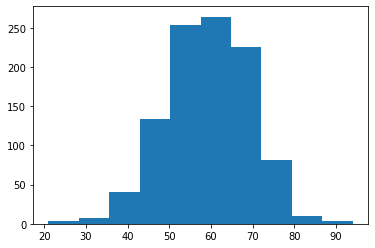

In [25]:
# See the distribution
plt.hist(lengthsPost, 10)
plt.show()

In [26]:
print(tokensPost[941])
print(tokensPre[941])
#len(gensim.utils.simple_preprocess(str(df.tokensPre[14])))

['row', 'ride', 'garden', 'nown', 'today', 'are', 'trip', 'cricket', 'part', 'speak', 'deal', 'home', 'cough', 'start', 'turn', 'quarter', 'keeper', 'stop', 'talker', 'gooch', 'rest']
['fany', 'come', 'row', 'tring', 'go', 'ride', 'wmile', 'walk', 'aooent', 'garden', 'nown', 'werncre', 'htarte', 'today', 'oaly', 'camnot', 'are', 'trip', 'ansom', 'cricket', 'part', 'day', 'come', 'speak', 'bakewall', 'see', 'beret', 'deal', 'unceran', 'leave', 'home', 'littte', 'cough', 'start', 'prap', 'onar', 'mamay', 'turn', 'lourne', 'trawille', 'quarter', 'make', 'keeper', 'aas', 'stop', 'talker', 'get', 'give', 'vegpp', 'gooch', 'rest', 'have', 'sarprised', 'see', 'go']


In [28]:
# How many are fewer than 20?
sum(i < 20 for i in lengthsPost)

0

#### Now for comparison, the pre-treatment corpus.

In [29]:
lengthsPre = []

for x in tokensPre:
    lengthsPre.append(len(x))

print(max(lengthsPre))
print(min(lengthsPre))
print(sum(lengthsPre)/len(lengthsPre))

# Let's have a look at the shortest text
# What one is it?
min(range(len(lengthsPre)), key=lengthsPre.__getitem__)

112
32
87.48387096774194


548

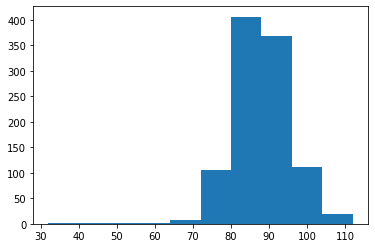

In [31]:
# See the distribution
plt.hist(lengthsPre, 10)
plt.show()

In [32]:
print(tokensPost[548])
print(tokensPre[548])

['put', 'boat', 'thing', 'pitch', 'tent', 'ground', 'shooting', 'kangaroo', 'shoot', 'return', 'sundown', 'find', 'guide', 'look', 'swan', 'egg', 'catch', 'swan', 'duck', 'eat', 'duck', 'pup']
['put', 'make', 'boat', 'take', 'thing', 'pitch', 'tent', 'have', 'dinner', 'ground', 'go', 'shooting', 'see', 'kangaroo', 'shoot', 'return', 'sundown', 'find', 'guide', 'canoe', 'look', 'swan', 'egg', 'catch', 'swan', 'musk', 'duck', 'eat', 'duck', 'get', 'have', 'pup']


## Saving work

In [33]:
with open("20240924_PhD_DiaChkNV_AuthorlessDownsampled.txt", "wb") as fp:   #Pickling
    pickle.dump(tokensPost, fp)